In [32]:
# Import the pandas library for data manipulation
import pandas as pd

# Load the surface air temperature data from the CSV file into a DataFrame
df_temperature = pd.read_csv('/content/surface-air-temperature-monthly-mean.csv')

## Understand the data



In [33]:
# Display the first few rows of the DataFrame to understand its structure
display(df_temperature.head())

# Get information about the DataFrame, including data types and non-null counts
df_temperature.info()

# Check for missing values in each column
display(df_temperature.isnull().sum())

,month,mean_temp
0,1982-01,25.9
1,1982-02,27.1
2,1982-03,27.2
3,1982-04,27.0
4,1982-05,28.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   month      462 non-null    object 
 1   mean_temp  462 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.3+ KB


,0
month,0
mean_temp,0


## Analyze temperature trends



In [34]:
# Convert the 'month' column to datetime objects
df_temperature['month'] = pd.to_datetime(df_temperature['month'])

# Set the 'month' column as the DataFrame index
df_temperature = df_temperature.set_index('month')

# Calculate the 12-month rolling average of the 'mean_temp'
df_temperature['rolling_avg_temp'] = df_temperature['mean_temp'].rolling(window=12).mean()

# Display the first few rows with the new rolling average column
display(df_temperature.head())

,mean_temp,rolling_avg_temp
month,,
1982-01-01,25.9,NaN
1982-02-01,27.1,NaN
1982-03-01,27.2,NaN
1982-04-01,27.0,NaN
1982-05-01,28.0,NaN


## Visualize the data



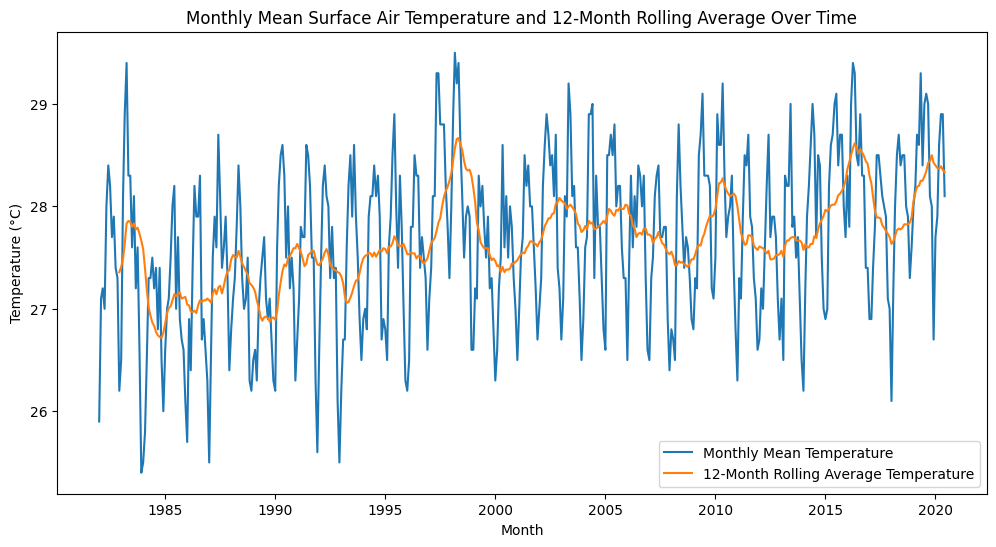

In [35]:
# Import the matplotlib library for plotting
import matplotlib.pyplot as plt

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Plot the monthly mean temperature
plt.plot(df_temperature.index, df_temperature['mean_temp'], label='Monthly Mean Temperature')

# Plot the 12-month rolling average temperature
plt.plot(df_temperature.index, df_temperature['rolling_avg_temp'], label='12-Month Rolling Average Temperature')

# Add labels and title to the plot
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title('Monthly Mean Surface Air Temperature and 12-Month Rolling Average Over Time')

# Add a legend to identify the lines
plt.legend()

# Display the plot
plt.show()

## Prepare data for modeling



In [36]:
# Extract the year and month from the datetime index
df_temperature['year'] = df_temperature.index.year
df_temperature['month_of_year'] = df_temperature.index.month

# Create a time step feature (sequential count of months)
df_temperature['time_step'] = range(len(df_temperature))

# Define features (X) and target variable (y)
X = df_temperature[['year', 'month_of_year', 'time_step']]
y = df_temperature['mean_temp']

# Set the size of the testing set (last 12 months)
test_size = 12

# Split the data into training and testing sets
X_train, X_test = X[:-test_size], X[-test_size:]
y_train, y_test = y[:-test_size], y[-test_size:]

# Display the head of the training and testing sets
display(X_train.head())
display(y_train.head())
display(X_test.head())
display(y_test.head())

,year,month_of_year,time_step
month,,,
1982-01-01,1982,1,0
1982-02-01,1982,2,1
1982-03-01,1982,3,2
1982-04-01,1982,4,3
1982-05-01,1982,5,4


,mean_temp
month,
1982-01-01,25.9
1982-02-01,27.1
1982-03-01,27.2
1982-04-01,27.0
1982-05-01,28.0


,year,month_of_year,time_step
month,,,
2019-07-01,2019,7,450
2019-08-01,2019,8,451
2019-09-01,2019,9,452
2019-10-01,2019,10,453
2019-11-01,2019,11,454


,mean_temp
month,
2019-07-01,29.0
2019-08-01,29.1
2019-09-01,29.0
2019-10-01,28.1
2019-11-01,28.0


## Choose and train a machine learning model



In [37]:
# Import the Linear Regression model from scikit-learn
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

## Evaluate the model



In [38]:
# Import metrics for model evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Print the evaluation metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')

Mean Absolute Error (MAE): 0.5881208909973662
Mean Squared Error (MSE): 0.521305262906162


## Forecast future temperatures


In [39]:
# Determine the last time step in the training data
last_time_step = X_train['time_step'].max()

# Create a DataFrame for the next 12 months
future_months = 12
future_time_steps = range(last_time_step + 1, last_time_step + 1 + future_months)

# Calculate the corresponding year and month for the future time steps
# Corrected: Start future_dates from the month after the last date in the original df_temperature
future_dates = pd.date_range(start=df_temperature.index[-1], periods=future_months + 1, freq='MS')[1:]
future_year = future_dates.year
future_month_of_year = future_dates.month

# Create the X_future DataFrame with features for future forecasting
X_future = pd.DataFrame({
    'year': future_year,
    'month_of_year': future_month_of_year,
    'time_step': future_time_steps
})

# Set the index of X_future to future_dates to align with the original data structure
X_future = X_future.set_index(future_dates)

# Predict future temperatures using the trained model
y_future_pred = model.predict(X_future)

# Display the forecasted temperatures
print("Forecasted Monthly Mean Temperatures for the next 12 months:")
display(pd.DataFrame({'forecasted_mean_temp': y_future_pred}, index=X_future.index))

Forecasted Monthly Mean Temperatures for the next 12 months:


,forecasted_mean_temp
2020-07-01,28.072716
2020-08-01,28.059020
2020-09-01,28.045324
2020-10-01,28.031628
2020-11-01,28.017932
2020-12-01,28.004236
2021-01-01,28.177899
2021-02-01,28.164203
2021-03-01,28.150508
2021-04-01,28.136812


## Project Summary

This notebook presents an end-to-end machine learning project to forecast monthly mean surface air temperatures.

**Project Goal:** Develop a machine learning model to forecast monthly mean air temperatures.

**Steps Taken:**

1.  **Data Loading and Understanding:** We loaded the surface air temperature data and inspected its structure, data types, and checked for missing values.
2.  **Analyzing and Visualizing Trends:** We analyzed temperature trends by calculating a rolling average and visualized both the monthly temperatures and the rolling average to identify seasonal patterns and the overall warming trend.
3.  **Data Preparation for Modeling:** We prepared the data by extracting features like year, month of year, and a time step, and split the data into training and testing sets.
4.  **Model Training and Evaluation:** We chose a Linear Regression model, trained it on the historical data, and evaluated its performance using MAE and MSE on the testing set.
5.  **Forecasting Future Temperatures:** We used the trained model to forecast the monthly mean temperatures for the next 12 months.

**Key Findings:**

*   The historical data shows a clear seasonal pattern and an increasing trend in surface air temperatures over time.
*   The Linear Regression model provides a reasonable forecast for future temperatures, although more complex models could potentially capture more nuanced patterns.
*   The evaluation metrics (MAE and MSE) indicate the model's performance on unseen data.